<a href="https://colab.research.google.com/github/Aswin-Cheerngodan/CNN/blob/main/vgg16model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
import os

import json
from zipfile import ZipFile

In [5]:
!pip install kaggle

In [6]:
kaggle_cred = json.load(open('kaggle.json'))

In [7]:
os.environ['KAGGLE_USERNAME'] = kaggle_cred['username']
os.environ['KAGGLE_KEY'] = kaggle_cred['key']

In [8]:
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
100% 346M/346M [00:13<00:00, 27.9MB/s]
100% 346M/346M [00:13<00:00, 26.0MB/s]


In [9]:
with ZipFile('intel-image-classification.zip','r') as zip:
  zip.extractall()

In [10]:
train_path = r'/content/seg_train/seg_train/'
test_path = r'/content/seg_test/seg_test/'


In [11]:
num_of_cls = len(glob(train_path+'/*'))

print(num_of_cls)

6


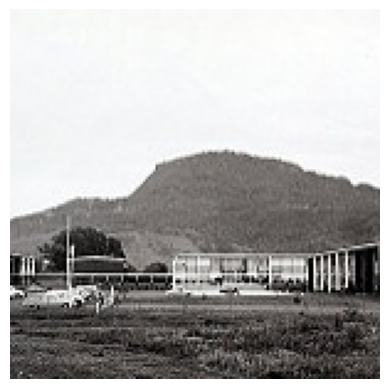

In [12]:
img = load_img(train_path+'/buildings/0.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [13]:
image_shape = img_to_array(img)
print(image_shape.shape)

(150, 150, 3)


In [14]:
train_gen = ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224))
val_gen = ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [15]:
vgg16 = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [16]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
for layer in vgg16.layers:
    layer.trainable = False

In [18]:
vgg16Model = Sequential([
    Input(shape=(224,224,3)),
    vgg16,
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(num_of_cls,activation='softmax')
])

In [19]:
vgg16Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,926,854 (68.39 MB)

 Trainable params: 3,212,166 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
vgg16Model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
batch_size = 32

history = vgg16Model.fit(train_gen,validation_data=val_gen,epochs=10,steps_per_epoch=train_gen.samples // batch_size,
                         validation_steps=val_gen.samples // batch_size)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


438/438 ━━━━━━━━━━━━━━━━━━━━ 92s 177ms/step - accuracy: 0.6944 - loss: 3.1888 - val_accuracy: 0.8283 - val_loss: 0.5441
Epoch 2/10
  1/438 ━━━━━━━━━━━━━━━━━━━━ 55s 126ms/step - accuracy: 0.7500 - loss: 0.6796

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


438/438 ━━━━━━━━━━━━━━━━━━━━ 29s 65ms/step - accuracy: 0.7500 - loss: 0.6796 - val_accuracy: 0.7917 - val_loss: 0.4069
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 93s 160ms/step - accuracy: 0.7770 - loss: 0.6854 - val_accuracy: 0.8407 - val_loss: 0.4415
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8750 - loss: 0.3236 - val_accuracy: 0.7917 - val_loss: 0.9578
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 160ms/step - accuracy: 0.8129 - loss: 0.5959 - val_accuracy: 0.8659 - val_loss: 0.4496
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.8125 - loss: 0.5623 - val_accuracy: 0.7917 - val_loss: 0.3505
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 70s 159ms/step - accuracy: 0.8383 - loss: 0.5415 - val_accuracy: 0.8898 - val_loss: 0.4043
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9062 - loss: 0.1602 - val_accuracy: 0.9167 - val_loss: 0.2137
Epoch 9/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 74s 160ms/step - accuracy: 0.8580 - loss: 0.4412 - val_accur

In [22]:
loss, accuracy = vgg16Model.evaluate(val_gen)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.8896 - loss: 0.3686
Validation Loss: 0.37455785274505615
Validation Accuracy: 0.8886666893959045
